In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def map_(v,x1,x2,y1,y2):
    ret = (v-x1)/(x2-x1) * (y2-y1) + y1
    return ret

In [3]:
spot_mini = 150
spot_maxi = 400
eqcp_mini = 225
eqcp_maxi = 550
inc=5
risque=5
eqcp_nb= (eqcp_maxi-eqcp_mini)/inc
spot_nb = (spot_maxi-spot_mini)/inc
print(spot_nb,eqcp_nb)
# map()

50.0 65.0


In [4]:
eqcp_list = np.array([i for i in range(eqcp_mini,eqcp_maxi,inc)])
spot_list = np.array([i for i in range(spot_mini,spot_maxi,inc)])

In [5]:
def get_price(eqcp,spot):
    fix_spot = 0.25
    new_rebate = ( 0.35 if eqcp>=450 else 0.33 if eqcp>=350 else 0.31)
    new_price = eqcp * (1-new_rebate) * (1-fix_spot) + fix_spot * spot
    old_rebate = ( 0.30 if eqcp>=350 else 0.28)
    var_spot = 0.40 if (((1-old_rebate)*eqcp)>(spot-risque)) else 0.
    old_price = eqcp * (1-old_rebate) * (1-var_spot) + var_spot*spot
    return new_price,old_price,new_rebate, old_rebate


In [6]:
eqcp = 497
spot = 260
n,o,nR,oR = get_price(eqcp=eqcp, spot=spot)
print(n,o,n-o,nR,oR)

307.2875 312.74 -5.452499999999986 0.35 0.3


In [7]:
df = pd.DataFrame(columns=eqcp_list)
for e in eqcp_list:
    pdS = pd.Series()
    for s in spot_list:
        n,o,_,_ = get_price(eqcp=e,spot=s)
        pdS[s] = int(o-n)
    df[e] = pdS
#df

In [8]:
y_ = pd.Series()
for x_ in eqcp_list:
    vx= map_(x_*0.65,eqcp_mini,eqcp_maxi,0,eqcp_nb-1)
    vy = map_(vx,spot_nb-1, 0,spot_mini,spot_maxi)
    y_[vx] = vy
print(y_)


-15.507692    479.120879
-14.867692    475.855573
-14.227692    472.590267
-13.587692    469.324961
-12.947692    466.059655
                 ...    
 22.892308    283.202512
 23.532308    279.937206
 24.172308    276.671900
 24.812308    273.406593
 25.452308    270.141287
Length: 65, dtype: float64


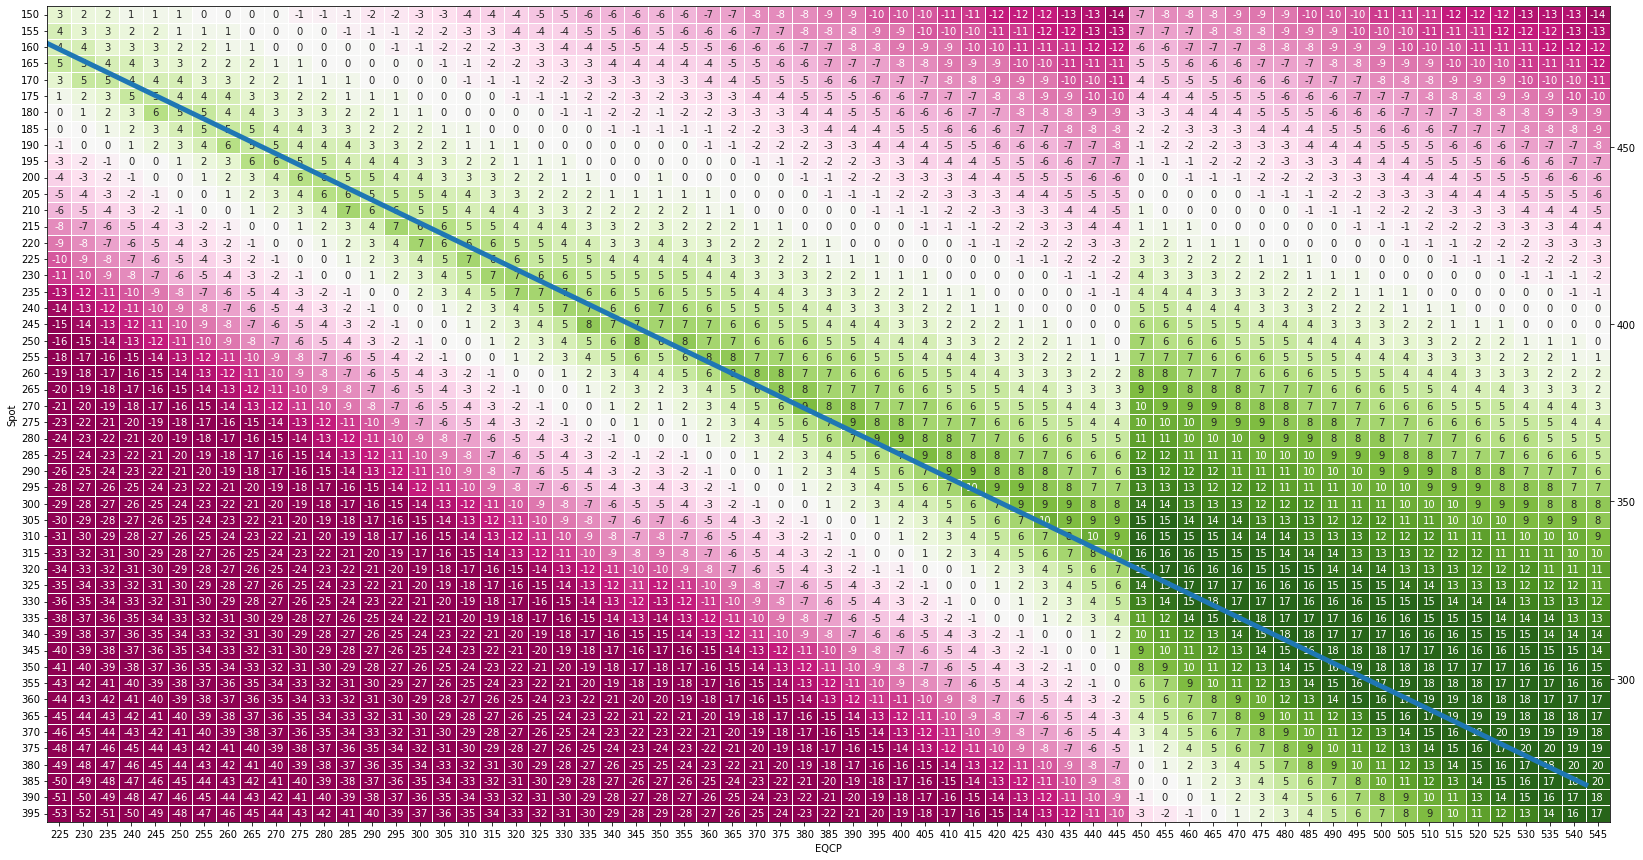

In [9]:
fig,ax = plt.subplots(figsize=(28,15))
# sns.set_palette("Paired")
plt.tick_params(bottom='on')
g = sns.heatmap(df.values,annot=True,xticklabels=eqcp_list, yticklabels=spot_list, linewidth=.5 ,cmap='PiYG', vmin=-15, vmax=15,cbar=False);
# im = ax.imshow(df ,cmap='PiYG', vmin=-15, vmax=15, aspect='auto');
g.set_xlabel('EQCP');
g.set_ylabel('Spot');
ax2 = plt.twinx()
x_ = (eqcp_list-eqcp_mini)/5
# y_ = (x_.max()-x_)*0.7
sns.lineplot(x=x_, y=y_, linewidth=5, ax=ax2);
# ax.plot(eqcp_list*0.7, linewidth=50);
# ax2.axis('tight')


In [10]:
545*0.65

354.25

In [11]:
geyser = sns.load_dataset("geyser")
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [12]:
fig = plt.figure(figsize=(28,15))
sns.set_palette("Paired")
graphe2 = sns.displot(data=df, x=df[200], y=df[350], kind='kde');


KeyError: 200

<Figure size 2016x1080 with 0 Axes>